In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import lib.correlation
import conditional_independence
sns.set_theme()
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
df_lucas0 = pd.read_csv("lucas0_train.csv")

# EDA

### General Description
- 2000 observational data with 12 features (1 target variable and 11 covariates).
- No missing values.
- all categorical features.

In [10]:
df_lucas0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Smoking             2000 non-null   int64
 1   Yellow_Fingers      2000 non-null   int64
 2   Anxiety             2000 non-null   int64
 3   Peer_Pressure       2000 non-null   int64
 4   Genetics            2000 non-null   int64
 5   Attention_Disorder  2000 non-null   int64
 6   Born_an_Even_Day    2000 non-null   int64
 7   Car_Accident        2000 non-null   int64
 8   Fatigue             2000 non-null   int64
 9   Allergy             2000 non-null   int64
 10  Coughing            2000 non-null   int64
 11  Lung_cancer         2000 non-null   int64
dtypes: int64(12)
memory usage: 187.6 KB


In [11]:
df_lucas0.describe()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.752500,0.782000,0.63050,0.341500,0.139500,0.32250,0.489500,0.723000,0.737000,0.34300,0.700500,0.721500
std,0.431668,0.412991,0.48279,0.474331,0.346554,0.46755,0.500015,0.447628,0.440373,0.47483,0.458154,0.448373
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Univariate analysis
- except born on even day, every other feature are unevenly distributed
- Given some of the factors, target features demonstrate significant uneven observational distribution

[seaborn doc](https://seaborn.pydata.org/tutorial/distributions.html)

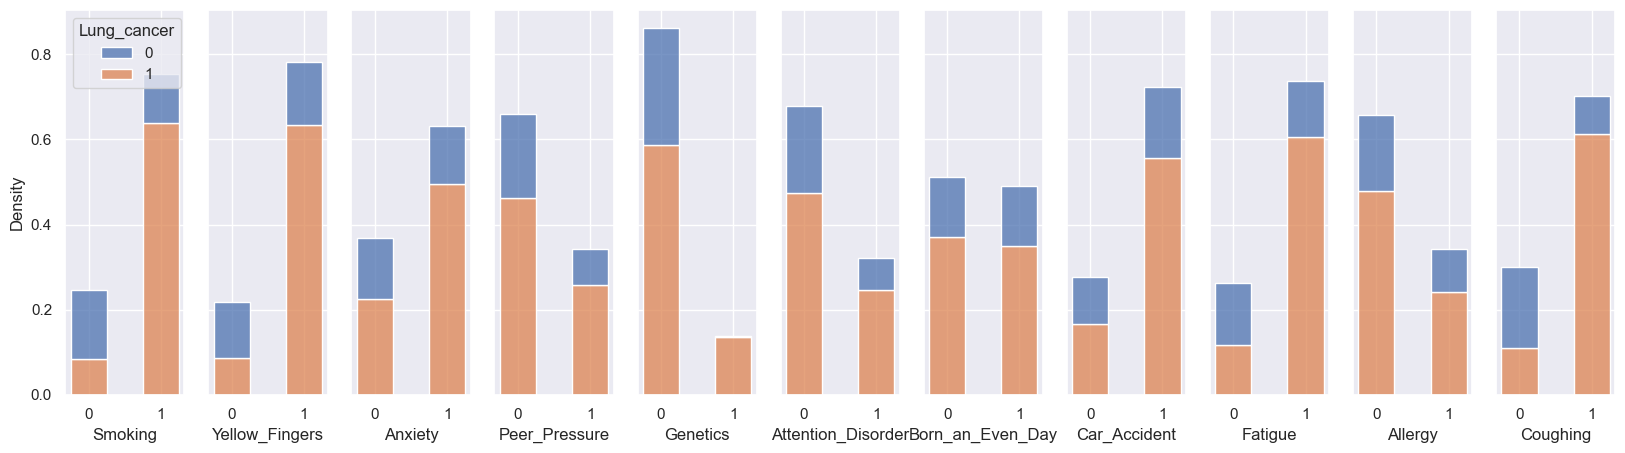

In [12]:
nb_features = df_lucas0.shape[1]
feature_labels = df_lucas0.columns.values
target_feature_label = feature_labels[11]
explanatory_feature_labels = feature_labels[:11]
fig, axes = plt.subplots(nrows=1, ncols=nb_features - 1, figsize=(20, 5), sharey=True)
for i in range(nb_features - 1):
    legend = True if i == 0 else False
    sns.histplot(data=df_lucas0, x=explanatory_feature_labels[i], hue=target_feature_label, stat="density",
                 discrete=True, shrink=.5, multiple="stack", common_bins=False, legend=legend, ax=axes[i])
    if i == 0: sns.move_legend(axes[i], "upper left")

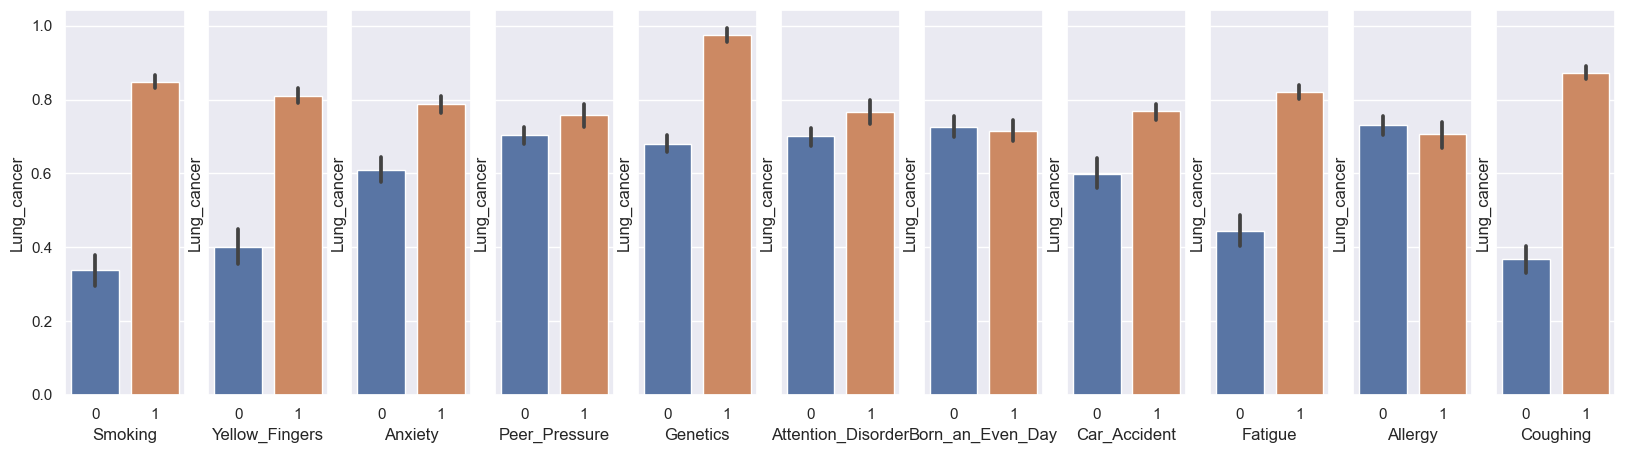

In [14]:
nb_features = df_lucas0.shape[1]
feature_labels = df_lucas0.columns.values
target_feature_label = feature_labels[11]
explanatory_feature_labels = feature_labels[:11]
fig, axes = plt.subplots(nrows=1, ncols=nb_features - 1, figsize=(20, 5), sharey=True)
for i in range(nb_features - 1):
    sns.barplot(data=df_lucas0, x=explanatory_feature_labels[i], y=target_feature_label, ax=axes[i])

## Bi-varaite analysis
- Notice some high correlated blocks:
    - smoking, yellow_finger, anxiety
    - genetics, attention_disorder
    - car_accident, fatigue
    - coughing, lung_cancer
    - allergy, coughing
    - smoking, lung_cancer

### Independency Test

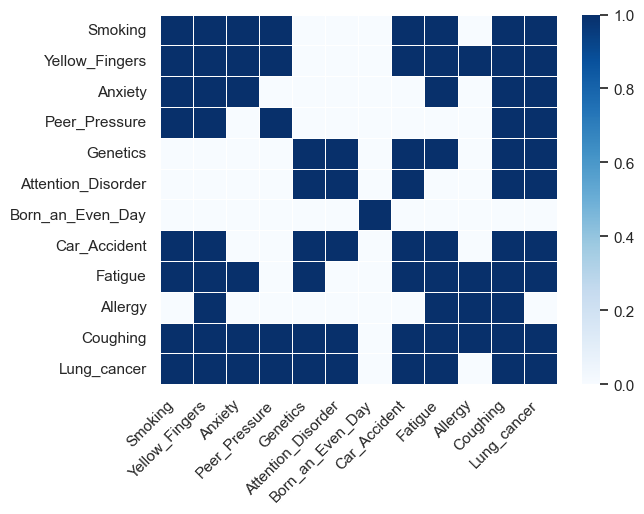

In [28]:
importlib.reload(lib.correlation)
import lib.correlation
from lib.correlation import chi2_matrix

# compute chi2_independency_matrix
chi2_independency_matrix = chi2_matrix(df_lucas0, alpha=0.05)

# plot heatmap
feature_labels = df_lucas0.columns.values
target_feature_label = feature_labels[0]
explanatory_feature_labels = feature_labels[1:]
ax = sns.heatmap(chi2_independency_matrix, linewidth=0.5, yticklabels=feature_labels, cmap="Blues")
ax.set_xticklabels(feature_labels, rotation = 45, ha="right")
plt.show()

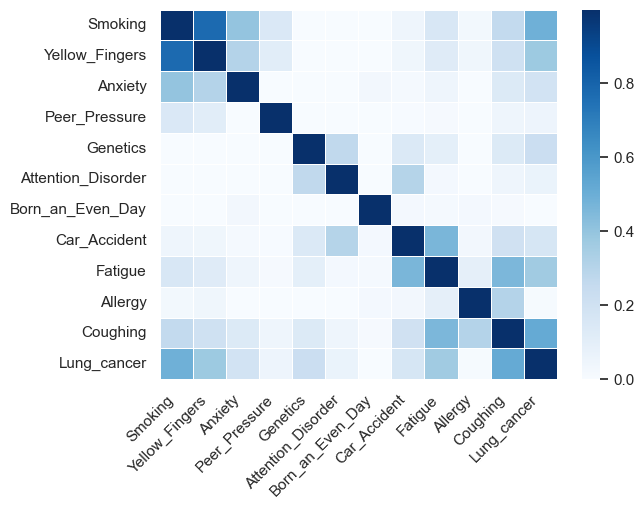

In [29]:
%reload_ext autoreload
from lib.correlation import cramer_v_matrix

# compute cramerv_matrix
cramerv_matrix = cramer_v_matrix(df_lucas0)

# plot heatmap
feature_labels = df_lucas0.columns.values
target_feature_label = feature_labels[0]
explanatory_feature_labels = feature_labels[1:]
ax = sns.heatmap(cramerv_matrix, linewidth=0.5, yticklabels=feature_labels, cmap="Blues")
ax.set_xticklabels(feature_labels, rotation = 45, ha="right")
plt.show()

### Conditional Independency Test

Yellow_Fingers <- Smoking -> Lung_cancer

$P(Lung_cancer |Yellow\_Fingers, Smoking) = P(Lung\_cancer, Smoking)$

In [58]:
# Yellow_Fingers
j = df_lucas0.columns.get_loc("Yellow_Fingers")
i = df_lucas0.columns.get_loc("Lung_cancer")
cond_set = [df_lucas0.columns.get_loc("Smoking")]
conditional_independence.hsic_test(df_lucas0.values, i=i, j=j, cond_set=cond_set)

{'statistic': 0.00011563705101251484,
 'p_value': 0.00010696907653062748,
 'reject': True,
 'mean_approx': 9.873962796569325e-06,
 'var_approx': 1.3880927848344542e-10}

In [70]:
from lib.correlation import chi2_test, conditional_chi2_test
df_lucas0_given_smoking_1 = df_lucas0[df_lucas0["Smoking"] == 1]
df_lucas0_given_smoking_0 = df_lucas0[df_lucas0["Smoking"] == 0]
chi2, p = chi2_test(df_lucas0["Yellow_Fingers"],df_lucas0["Lung_cancer"])
print(f"chi2 p-value: {p}")
chi2, p = chi2_test(df_lucas0_given_smoking_1["Yellow_Fingers"],df_lucas0_given_smoking_1["Lung_cancer"])
print(f"conditional chi2 p-value: {p}")
chi2, p = chi2_test(df_lucas0_given_smoking_0["Yellow_Fingers"],df_lucas0_given_smoking_0["Lung_cancer"])
print(f"conditional chi2 p-value: {p}")

chi2 p-value: 2.3478864198539383e-63
conditional chi2 p-value: 0.8713007238104256
conditional chi2 p-value: 1.0


In [86]:
importlib.reload(lib.correlation)
import lib.correlation
from lib.correlation import conditional_chi2_test
j = df_lucas0.columns.get_loc("Yellow_Fingers")
i = df_lucas0.columns.get_loc("Lung_cancer")
cond_set = [df_lucas0.columns.get_loc("Smoking")]
conditional_chi2_test(df_lucas0.values, i=i, j=j, cond_set=cond_set)

(0.0, 1.0)